<a href="https://colab.research.google.com/github/mahyarr017/Interpreting-the-Relation-Between-College-Basketball-Leaderboards-and-NBA-Draft-Picks/blob/master/CMSC320_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpreting the Relation Between College Basketball Leaderboards and NBA Draft Picks
##Ethan Farkas, Mahyar Raza, Luke Vacek



##Overview
College basketball serves as the primary training and testing ground for many NBA hopefuls.  College players are all working to optimize their potential to be professional basketball players, where they can make millions of dollars a year playing the game.  With that in mind, what aspects of basketball are the most important in predicting the future success of a college basketball player?  

ESPN publishes leaderboards of  top ranked college players in the NCAA.  These leaderboards span different categories, including scoring, rebounds, field goals, and free-throws.  We also have access to the NBA draft picks, where professional teams recruit college players.  The draft picks tell us both if a college player was recruited to a professional team as well as the number of the draft pick.  The lower the draft pick number, the more desirable the college player was seen as.

## External Libraries

For this project we will be utilizing the following external libraries:


*   [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/): A web-scraping library that will assist us in pulling data from ESPN.com
*   [Requests](http://docs.python-requests.org/en/master/): A library to help simplify HTTP requests
*   [Pandas](https://pandas.pydata.org/): A library that provides data structures and tools for data analysis



In [0]:
!pip install lxml 

from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression


## Scraping data

First, we must gather the data of top scoring players from the [ESPN website](http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2014). Because we cannot download this data to use directly, we will utilize BeautifulSoup in order to gather the data from the table object, and store it in a pandas dataframe.

In [0]:
# Request data from website
r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2014')
data = r.text

# Using Beautiful Soup to parse text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

# Convert text into data for pandas dataframe
df1 = pd.read_html(str(table))[0]
df1.columns = df1.iloc[0]

df1.head(10)

,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
0,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
1,1,"Doug McDermott, F",CREI,33,33.6,26.9,9.4-17.9,.525,2.8-6.3,.454,5.3-6.1,.866
2,2,"Antoine Mason, G",NIAG,33,37.6,25.6,8.2-18.5,.440,1.5-5.1,.286,7.9-10.8,.728
3,3,"T.J. Warren, F",NCST,33,35.3,24.8,9.7-18.5,.525,0.9-3.4,.277,4.4-6.2,.711
4,4,"Billy Baron, G",CAN,33,38.9,24.2,7.2-15.5,.467,3.1-7.4,.424,6.5-7.4,.882
5,5,"Patrick Miller, G",TNST,30,37.7,23.7,7.7-17.1,.447,1.5-4.4,.336,6.9-8.9,.776
6,6,"Tyler Haws, G",BYU,32,34.6,23.4,7.7-16.4,.466,1.2-3.0,.411,6.8-7.8,.880
7,7,"D.J. Balentine, G",EVAN,33,37.9,22.8,6.9-16.0,.434,2.4-5.9,.398,6.5-7.7,.847
8,8,"Tyler Harvey, G",EWU,31,37.4,21.8,6.6-15.0,.443,3.5-8.1,.433,5.0-5.6,.897
9,9,"Bryce Cotton, G",PROV,34,39.9,21.4,6.4-15.5,.413,2.2-5.9,.368,6.4-7.6,.849


Because the data is separated across 3 pages, we must do this two additional times, creating dataframes for each page. Finally, we append the dataframes together to get our full table. 

In [0]:
r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2014/count/41')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df2 = pd.read_html(str(table))[0]
df2.columns = df2.iloc[0]

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2014/count/81')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df3 = pd.read_html(str(table))[0]
df3.columns = df3.iloc[0]

df = df1.append(df2).append(df3)
df.head(10)

,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
0,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
1,1,"Doug McDermott, F",CREI,33,33.6,26.9,9.4-17.9,.525,2.8-6.3,.454,5.3-6.1,.866
2,2,"Antoine Mason, G",NIAG,33,37.6,25.6,8.2-18.5,.440,1.5-5.1,.286,7.9-10.8,.728
3,3,"T.J. Warren, F",NCST,33,35.3,24.8,9.7-18.5,.525,0.9-3.4,.277,4.4-6.2,.711
4,4,"Billy Baron, G",CAN,33,38.9,24.2,7.2-15.5,.467,3.1-7.4,.424,6.5-7.4,.882
5,5,"Patrick Miller, G",TNST,30,37.7,23.7,7.7-17.1,.447,1.5-4.4,.336,6.9-8.9,.776
6,6,"Tyler Haws, G",BYU,32,34.6,23.4,7.7-16.4,.466,1.2-3.0,.411,6.8-7.8,.880
7,7,"D.J. Balentine, G",EVAN,33,37.9,22.8,6.9-16.0,.434,2.4-5.9,.398,6.5-7.7,.847
8,8,"Tyler Harvey, G",EWU,31,37.4,21.8,6.6-15.0,.443,3.5-8.1,.433,5.0-5.6,.897
9,9,"Bryce Cotton, G",PROV,34,39.9,21.4,6.4-15.5,.413,2.2-5.9,.368,6.4-7.6,.849


We perform the same process to scrape data for other years. Once the text is retrieved and converted into a pandas dataframe, we append that dataframe to the main dataframe.

In [0]:

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2013')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df1 = pd.read_html(str(table))[0]
df1.columns = df1.iloc[0]

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2013/count/41')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df2 = pd.read_html(str(table))[0]
df2.columns = df2.iloc[0]

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2013/count/81')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df3 = pd.read_html(str(table))[0]
df3.columns = df3.iloc[0]

df = df.append(df1).append(df2).append(df3)

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2012')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df1 = pd.read_html(str(table))[0]
df1.columns = df1.iloc[0]

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2012/count/41')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df2 = pd.read_html(str(table))[0]
df2.columns = df2.iloc[0]

r = requests.get('http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/points/year/2012/count/81')
data = r.text
soup = BeautifulSoup(data, "html.parser")
table = soup.find("table")

df3 = pd.read_html(str(table))[0]
df3.columns = df3.iloc[0]

df = df.append(df1).append(df2).append(df3)

df.head(10)


,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
0,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
1,1,"Doug McDermott, F",CREI,33,33.6,26.9,9.4-17.9,.525,2.8-6.3,.454,5.3-6.1,.866
2,2,"Antoine Mason, G",NIAG,33,37.6,25.6,8.2-18.5,.440,1.5-5.1,.286,7.9-10.8,.728
3,3,"T.J. Warren, F",NCST,33,35.3,24.8,9.7-18.5,.525,0.9-3.4,.277,4.4-6.2,.711
4,4,"Billy Baron, G",CAN,33,38.9,24.2,7.2-15.5,.467,3.1-7.4,.424,6.5-7.4,.882
5,5,"Patrick Miller, G",TNST,30,37.7,23.7,7.7-17.1,.447,1.5-4.4,.336,6.9-8.9,.776
6,6,"Tyler Haws, G",BYU,32,34.6,23.4,7.7-16.4,.466,1.2-3.0,.411,6.8-7.8,.880
7,7,"D.J. Balentine, G",EVAN,33,37.9,22.8,6.9-16.0,.434,2.4-5.9,.398,6.5-7.7,.847
8,8,"Tyler Harvey, G",EWU,31,37.4,21.8,6.6-15.0,.443,3.5-8.1,.433,5.0-5.6,.897
9,9,"Bryce Cotton, G",PROV,34,39.9,21.4,6.4-15.5,.413,2.2-5.9,.368,6.4-7.6,.849


Now that we have gathered the data for the top college players from 2012, 2013, and 2014, we need to get the data for the NBA Draft. We found a dataset on Kaggle that provides information on every draft pick for the past 20 years.

In [0]:
# Get csv file of nba draft data
url = 'https://raw.githubusercontent.com/efarka/efarka.github.io/master/NBA_Draft_1980_2017.tsv'

# Use pandas to read tsv file and make table
draft_data = pd.read_csv(url, sep='\t')

##Data Tidying
Next, we need to clean up the data that we got from ESPN. Currently, there are header rows interspersed in the table. We can remove them by dropping the rows that contain the header field.

We then reset the indexes, so that they once again count from 1 to 100.



In [0]:
# Remove header rows
df = df[df['RK'] != 'RK']

#Reset index for nicer numbers
df = df.reset_index()

Because players can choose to go pro or stay in college for four years, we need to remove any duplicate names in the dataset.

In [0]:
# Remove duplicate player entries from the dataset
df = df.drop_duplicates(subset='PLAYER', keep="first")

# Reset indexes so number works better
df.reset_index()
print()

Then, we split the columns such as 'FGM-FGA', that are actually encoding two values into their separate  fields. This will allow us to do processing with each variable independently. Then, we can drop all the old columns that are now redundant. 

Finally, we convert the rows containing numerics so that pandas recognizes them as numerics. This will allow us to graph these values and perform regression.

In [0]:


#Split multivariable columns
df['FGM'], df['FGA'] = df['FGM-FGA'].str.split('-', 1).str
df['3PM'], df['3PA'] = df['3PM-3PA'].str.split('-', 1).str
df['FTM'], df['FTA'] = df['FTM-FTA'].str.split('-', 1).str
df['PLAYER'], df['POSITION'] = df['PLAYER'].str.split(',', 1).str
df['FIRST_NAME'], df['LAST_NAME'] = df['PLAYER'].str.split(' ', 1).str

# Remove unneeded columns
df = df.drop(columns=['index', 'RK', 'PLAYER', 'FGM-FGA', '3PM-3PA', 'FTM-FTA'])

# Convert numeric rows to numeric values
cols = ['GP', 'MPG', 'PTS', 'FG%', '3P%', 'FT%', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Get rid of all non-alphabet characters in names
df.FIRST_NAME = df.FIRST_NAME.str.replace('[,-.\'\" ]', '')
df.LAST_NAME = df.LAST_NAME.str.replace('[,-.\'\" ]', '')

df.FIRST_NAME = df.FIRST_NAME.str.strip()
df.LAST_NAME = df.LAST_NAME.str.strip()

df.head(10)


,TEAM,GP,MPG,PTS,FG%,3P%,FT%,FGM,FGA,3PM,3PA,FTM,FTA,POSITION,FIRST_NAME,LAST_NAME
0,CREI,33.0,33.6,26.9,0.525,0.454,0.866,9.4,17.9,2.8,6.3,5.3,6.1,F,Doug,McDermott
1,NIAG,33.0,37.6,25.6,0.440,0.286,0.728,8.2,18.5,1.5,5.1,7.9,10.8,G,Antoine,Mason
2,NCST,33.0,35.3,24.8,0.525,0.277,0.711,9.7,18.5,0.9,3.4,4.4,6.2,F,TJ,Warren
3,CAN,33.0,38.9,24.2,0.467,0.424,0.882,7.2,15.5,3.1,7.4,6.5,7.4,G,Billy,Baron
4,TNST,30.0,37.7,23.7,0.447,0.336,0.776,7.7,17.1,1.5,4.4,6.9,8.9,G,Patrick,Miller
5,BYU,32.0,34.6,23.4,0.466,0.411,0.880,7.7,16.4,1.2,3.0,6.8,7.8,G,Tyler,Haws
6,EVAN,33.0,37.9,22.8,0.434,0.398,0.847,6.9,16.0,2.4,5.9,6.5,7.7,G,DJ,Balentine
7,EWU,31.0,37.4,21.8,0.443,0.433,0.897,6.6,15.0,3.5,8.1,5.0,5.6,G,Tyler,Harvey
8,PROV,34.0,39.9,21.4,0.413,0.368,0.849,6.4,15.5,2.2,5.9,6.4,7.6,G,Bryce,Cotton
9,YSU,32.0,36.5,21.3,0.506,0.356,0.736,6.7,13.3,1.9,5.4,5.9,8.1,G,Kendrick,Perry


__Understanding Basketball Terminology__:
There are a few ways to measure player’s scoring performance.  The abbreviations in the table above represent the following:

__GP__: Games Played

__MPG__: Minutes Per Game

__PTS__: Number of points scored

__FGM, FGA, FG%__: number of field goals made, number of field goals attempted, percentage of field goals made.  A field goal is any attempt to score made from anywhere on the court.

This same format is applied for 3 point shots (shot further back from hoop) and free throw shots (shot after a penalty)


Now that we tidied up the college player data, we need to tidy the NBA draft data. TIdying the draft data is a similar process to tidying the college player data. Also, since the college data starts from 2012, we can ignore all draft entries prior to this period.

In [0]:
#Splitting the player column to a first name and last name column
draft_data['LAST_NAME'], draft_data['FIRST_NAME'] = draft_data['player'].str.split(', ', 1).str
draft_data = draft_data.drop(['player'], axis=1)

# FIlter draft pick data so only players are picked after 2011
draft_data = draft_data[draft_data.year > 2011]

# Get rid of all non-alphabet characters
draft_data.FIRST_NAME = draft_data.FIRST_NAME.str.replace('[,-.\'\" ]', '')
draft_data.LAST_NAME = draft_data.LAST_NAME.str.replace('[,-.\'\" ]', '')

draft_data.FIRST_NAME = draft_data.FIRST_NAME.str.strip()
draft_data.LAST_NAME = draft_data.LAST_NAME.str.strip()
draft_data.head(10)

,year,round,pick,position,school,LAST_NAME,FIRST_NAME
1747,2012,1,1.0,PF/C,Kentucky,Davis,Anthony
1748,2012,1,2.0,SF,Kentucky,KiddGilchrist,Michael
1749,2012,1,3.0,SG,Florida,Beal,Bradley
1750,2012,1,4.0,SG,Syracuse,Waiters,Dion
1751,2012,1,5.0,PF,Kansas,Robinson,Thomas
1752,2012,1,6.0,PG,Weber St.,Lillard,Damian
1753,2012,1,7.0,SF,North Carolina,Barnes,Harrison
1754,2012,1,8.0,SG,Washington,Ross,Terrence
1755,2012,1,9.0,C,Connecticut,Drummond,Andre
1756,2012,1,10.0,SG,Duke,Rivers,Austin


##Data Exploration and Analysis

The first step in exploring and analyzing the data is to merge the college player dataset with the NBA Draft dataset. We will merge based off player names so that the new dataframe will show for each player in the college dataset what round the player was drafted, if he was drafted at all.

In [0]:
# Merging dataframes based off first and last name
merged = df.merge(draft_data, on=['FIRST_NAME', 'LAST_NAME'], how='left')
merged=merged.drop(columns=['POSITION','position', 'school', 'round', 'year'])

# Create a new column that tells whether a player was drafted or not
merged['WAS_PICKED'] = merged['pick'].apply(lambda x: 0 if pd.isnull(x) else 1)
merged.head(10)

,TEAM,GP,MPG,PTS,FG%,3P%,FT%,FGM,FGA,3PM,3PA,FTM,FTA,FIRST_NAME,LAST_NAME,pick,WAS_PICKED
0,CREI,33.0,33.6,26.9,0.525,0.454,0.866,9.4,17.9,2.8,6.3,5.3,6.1,Doug,McDermott,11.0,1
1,NIAG,33.0,37.6,25.6,0.440,0.286,0.728,8.2,18.5,1.5,5.1,7.9,10.8,Antoine,Mason,NaN,0
2,NCST,33.0,35.3,24.8,0.525,0.277,0.711,9.7,18.5,0.9,3.4,4.4,6.2,TJ,Warren,14.0,1
3,CAN,33.0,38.9,24.2,0.467,0.424,0.882,7.2,15.5,3.1,7.4,6.5,7.4,Billy,Baron,NaN,0
4,TNST,30.0,37.7,23.7,0.447,0.336,0.776,7.7,17.1,1.5,4.4,6.9,8.9,Patrick,Miller,NaN,0
5,BYU,32.0,34.6,23.4,0.466,0.411,0.880,7.7,16.4,1.2,3.0,6.8,7.8,Tyler,Haws,NaN,0
6,EVAN,33.0,37.9,22.8,0.434,0.398,0.847,6.9,16.0,2.4,5.9,6.5,7.7,DJ,Balentine,NaN,0
7,EWU,31.0,37.4,21.8,0.443,0.433,0.897,6.6,15.0,3.5,8.1,5.0,5.6,Tyler,Harvey,51.0,1
8,PROV,34.0,39.9,21.4,0.413,0.368,0.849,6.4,15.5,2.2,5.9,6.4,7.6,Bryce,Cotton,NaN,0
9,YSU,32.0,36.5,21.3,0.506,0.356,0.736,6.7,13.3,1.9,5.4,5.9,8.1,Kendrick,Perry,NaN,0


Now that we have a tidied dataframe that combines draft data with college player data, we can create graphs to explore our data. The stats that we would like to explore relationships for are field goal percentage, 3 point percentage, free throw percentage, and points per game.

In [0]:
# Create a copy of merged dataframe to keep track of players who got drafted
drafted=merged.copy()
drafted=drafted[pd.isnull(drafted.pick)==False]

# Create a dataframe to look at of 3 point percentage for all college players
merged3pts=merged.copy()
# Drop all players who didn't shoot 3's (players with 0% 3 point shooting)
merged3pts=merged3pts[merged3pts['3P%']!=0]

# Create a dataframe to look at of 3 point percentage for all drafted players
drafted3pts=drafted.copy()
# Drop all players who didn't shoot 3's (players with 0% 3 point shooting)
drafted3pts=drafted3pts[drafted3pts['3P%']!=0]


###Drafted and Not Drafted Players: Histogram
First we will visually represent all the players in the NCAA, both those who were and weren’t drafted.  We use a histogram to group these players by statistics, and then show what proportion of the players were drafted into the NCAA.  We use a stacked histogram in matplotlib to achieve this.

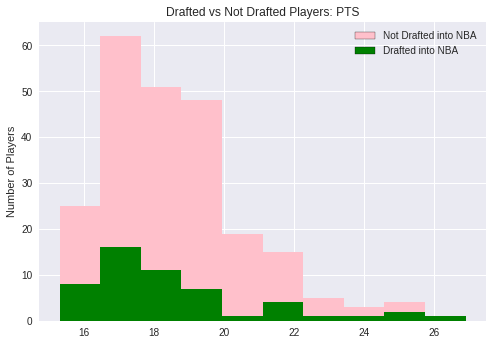

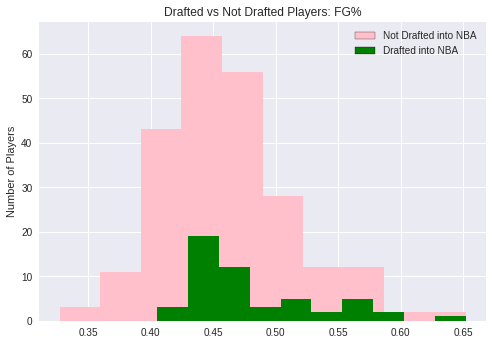

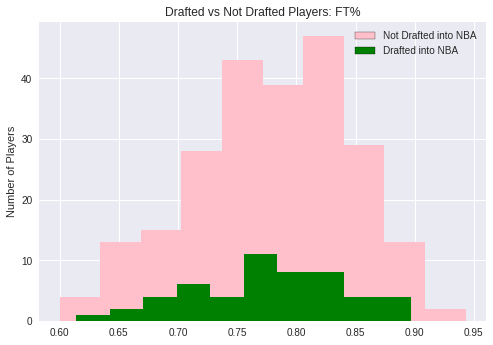

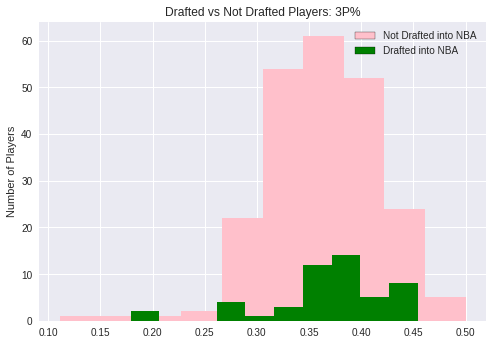

In [0]:
attributes=['PTS', 'FG%', 'FT%', '3P%']
for x in attributes:    
  if x=='3P%':
    mergedpts=merged3pts[x]  
    draftedpts=drafted3pts[x]
  else:
    mergedpts=merged[x]  
    draftedpts=drafted[x]
  
  c1='pink'
  c2='green'
  p1=plt.hist(mergedpts, color=c1)
  p2=plt.hist(draftedpts, color=c2)
  plt.title('Drafted vs Not Drafted Players: ' + x)
  plt.ylabel('Number of Players')
  
  #legend
  handles = [Rectangle((0,0),1,1,color=c1,ec="k"),Rectangle((0,0),1,1,color=c2,ec="k") ]
  plt.legend(handles, ('Not Drafted into NBA', 'Drafted into NBA'))
  
  
  plt.show()
  print('\n\n')

Just from looking at these plots, we can see that when grouped by field goal percentage, players who were drafted into the NBA are grouped towards higher buckets.  This suggests to us that field goal percentage might be important.  The other graphs are not nearly so conclusive.

###Draft Order: Linear Regression
We will now look at draft order for players who were drafted into the NBA. We will use linear regression to analyze the effect of different attributes on draft number.  Draft number is a numerical attribute, so our line of best fit will show us the relation between different metrics and draft pick.


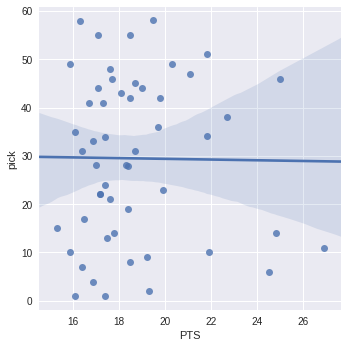

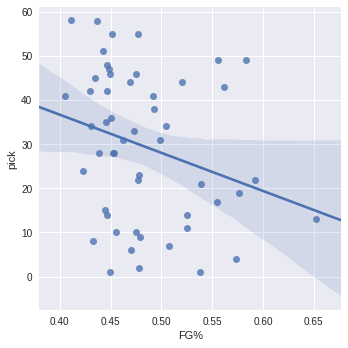

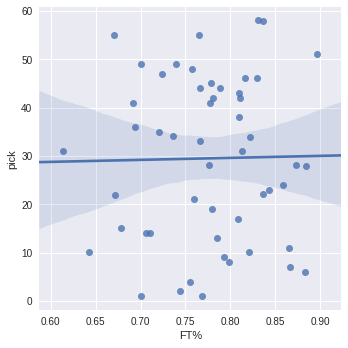

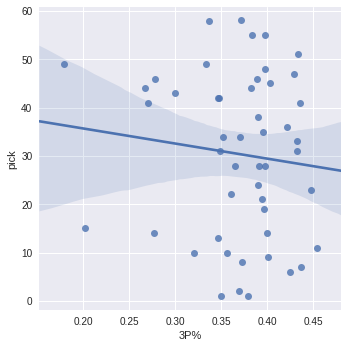

In [0]:
#linear regression plotting
for att in attributes:
  if(att=='3P%'):
    sns.lmplot(data=drafted3pts, x=att, y='pick', y_jitter = .01)
  else:
    sns.lmplot(data=drafted, x=att, y='pick', y_jitter = .01)
  
  


As a lower draft pick is most desired, the most relevant aspect will have a negative slope, meaning that it is correlated with a lower draft pick.  From looking at these graphs, both field goal percentage and three point percentage have negative slopes.  The others are flat, meaning there is not a significant correlation between those values and draft pick.

###Draft Probability: Coefficient Analysis
Now, we will perform a linear regression using sklearns model. The values returned from this regression will be the weights for each of the stats we are testing. In this model we are comparing different attributes to how likely a player is to get drafted into the NBA. A 1 signifies a player who was drafted, while a 0 is a player who was not.  A higher coefficient thus signifies a desirable attribute.

In [0]:
x=merged[attributes]
y=merged[['WAS_PICKED']]
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

coefs = lm.coef_.tolist()[0]
for attr, coef in zip(attributes, coefs):
    print("Attribute: {}, Coefficient: {}".format(attr,coef))

Attribute: PTS, Coefficient: 0.0013599577441004377
Attribute: FG%, Coefficient: 2.24846144435358
Attribute: FT%, Coefficient: 0.22391647828670447
Attribute: 3P%, Coefficient: 0.419290883349718


##Conclusion
At least for the data we analyzed, it seems that field goal percentage is the most important aspect in determining a player’s NBA potential.  Among all the metrics we analyzed, field goal percentage consistently was the most significant.  This is true both in determining if a NCAA player would be drafted into the NBA, and in determining how early a player would be drafted.  Field goal percentage was followed by three point percentage and free throw percentage. Surprisingly enough, we found that the actual number of points scored had almost no effect on whether a player would be drafted.  

Points had an astoundingly low correlation of .001, which while surprising, could be explained by a couple of reasons. Although a player has a high scoring output, this does not indicate how efficient the player is with his shooting. A player could score a large amount, but if he is not scoring at an efficient rate, then he is wasting a lot of possessions. Another possible reason is that scoring averages do not take into account how strong the opposition's defense is. Thus, a more efficient scorer would be more appealing to professional teams rather than a bulk scorer. 

Although this analysis looked at how these stats affected draft success, there is much more room for exploration. Analysis could be done on how a drafted player's stats change throughout his professional career. This, in turn, could be used to predict how successful a college basketball player would be in the NBA. Advanced stats could also be looked at such as PER (Player Efficiency Rating), to have a more in depth analysis of a college player's potential. 

